## 목표
#### 1. Estimate the factors affecting grade of students.
#### 2. Estimate the level of alcohol consumption among students.
#### 3. Build a machine learning model which is able to predict grade of students based on the available features.

## 데이터 구성

original dataset은 두 가지로 구성되어 있음.

1. 수학을 공부하는 학생 data (student-mat.csv)

2. 포르투갈어 언어를 공부하는 학생 data (student-port.csv)

하지만, 이번 과제에서는 수학을 공부하는 학생 data만을 사용할 것임.

출처: https://www.kaggle.com/uciml/student-alcohol-consumption


## 데이터 설명

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy import stats
from sklearn.utils import resample
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [5]:
df_math = pd.read_csv('./data/student-mat.csv')

In [6]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
print(df_math.shape)

(395, 33)


In [8]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [34]:
df_math.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ✅ 알 수 있는 것!

- df_math 데이터셋은 395명의 학생들에 대한 데이터를 담고 있음.

- 33개의 변수가 있으며, 대부분이 범주형 변수(categorical variables)임.

- 몇 가지 변수들은 numerical하게 보일 수 있지만 실은 categorical한 변수임. (ex. Medu - mother's education)

- 수치형 변수(numerical variables)는 5가지 이다. - age, absences, G1, G2, G3 (grades)

- missing value는 없음.

## EDA

#### 1. 어떤 feature가 grade에 영향을 미치는가?
#### 2. Alcohol Consumption이 grade에 미치는 영향은?

### 1. Genral EDA with Basic features (age, sex, gender)

In [38]:
pd.concat([df_math['school'].value_counts(), df_math['school'].value_counts(normalize=True).to_frame()], axis=1)

,school,school
GP,349,0.883544
MS,46,0.116456


#### ✅ 알 수 있는 것!
- df_math 데이터에서 학생의 약 88%가 Gabriel Pereira 학교에 속해있고, 나머지가 Mousinho da Silveira 학교에 속해있음을 알 수 있음.

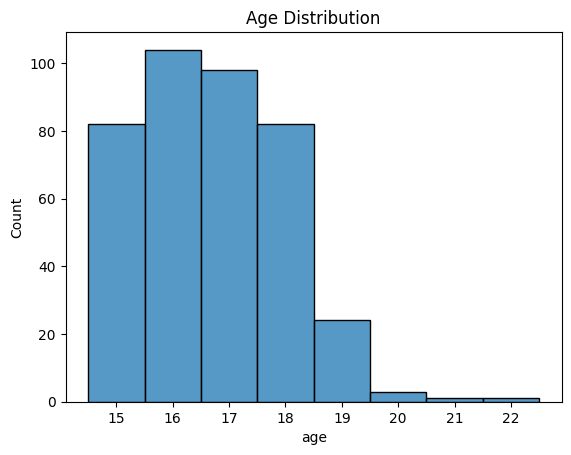

In [40]:
# Basic feature - age
sns.histplot(df_math.age, bins=8, discrete=True)
plt.title('Age Distribution')
plt.show()

#### ✅ 알 수 있는 것!
- 학생의 나이는 대부분 15세~18세 사이에 븐포해 있음을 알 수 있고, 가장 나이가 많은 학생은 22세임을 알 수 있음.

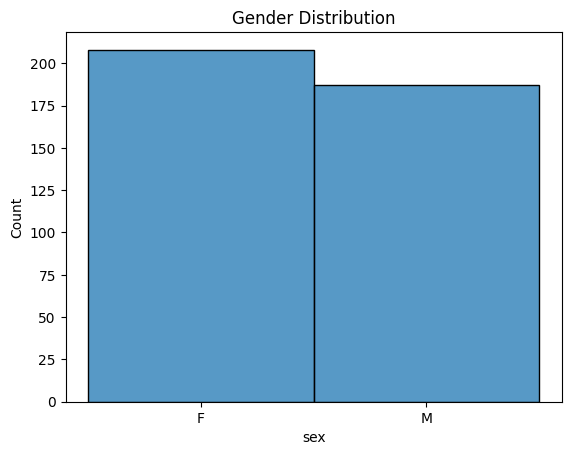

In [42]:
# Basic Feature - gender
sns.histplot(df_math.sex)
plt.title("Gender Distribution")
plt.show()

#### ✅ 알 수 있는 것!
- 여자의 수가 남자의 수보다 많음을 알 수 있음.

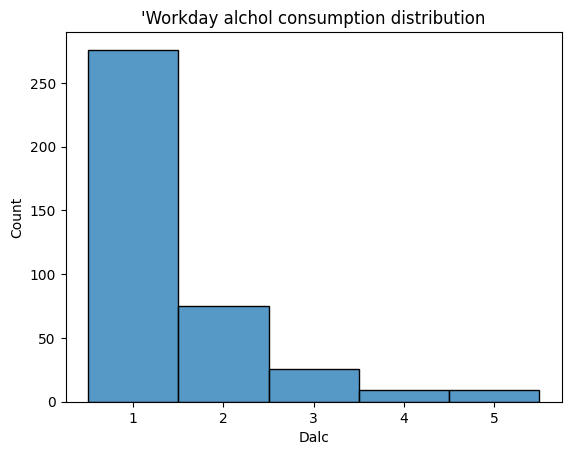

In [43]:
# feature Dalc. workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
sns.histplot(df_math.Dalc, discrete=True)
plt.title("'Workday alchol consumption distribution")
plt.show()

In [44]:
df_math['Dalc'].value_counts(normalize=True)

1    0.698734
2    0.189873
3    0.065823
5    0.022785
4    0.022785
Name: Dalc, dtype: float64

#### ✅ 알 수 있는 것!

- 대다수의 학생 (약70%)이 주중에는 술을 마시지 않는 것을 알 수 있음.

- Dalc 변수에서 1은 아주 적은 alcohol 소비를 의미하는데, 변수에 0이 없는 것이 의문임...! (왜 주중에 alcohol 소비를 아예 하지 않는 학생은 없는가????)

- 따라서 아주 적은 alcohol 소비를 "no alcohol"로 해석해볼 것.
    - 약 19% :  a bit more than nothing
    - 약 2.5% : a lot during the week

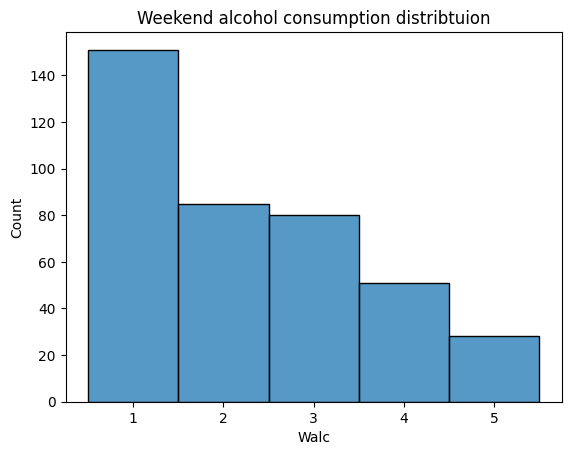

In [9]:
# feature Walc. weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
sns.histplot(df_math.Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

In [10]:
df_math['Walc'].value_counts(normalize=True)

1    0.382278
2    0.215190
3    0.202532
4    0.129114
5    0.070886
Name: Walc, dtype: float64

#### ✅ 알 수 있는 것!
- **여기서 알 수 있는 중요한 사실은, 학생들이 주말에 alcohol을 마시기 시작한다는 것!**

In [11]:
df_math[df_math['Dalc'] == 1]['Walc'].value_counts(normalize=True)

1    0.543478
2    0.235507
3    0.152174
4    0.054348
5    0.014493
Name: Walc, dtype: float64

#### ✅ 알 수 있는 것!
- **주중에 alcohol을 마시지 않는 학생 중, 주말에 alchol을 마시는 학생은 약 45%(2~5의 합계)**

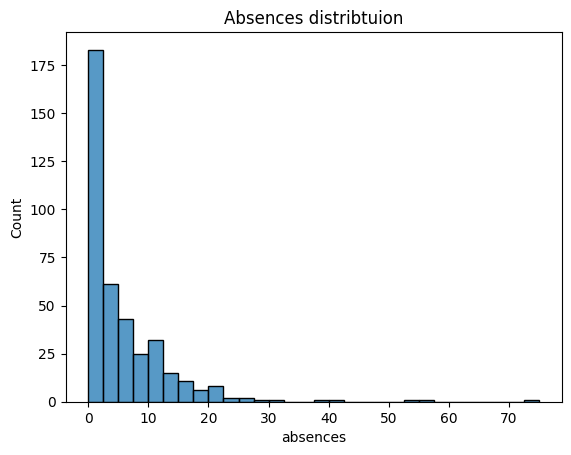

In [12]:
# Absence feature
sns.histplot(df_math['absences'], bins=30)
plt.title('Absences distribtuion')
plt.show()

#### ✅ 알 수 있는 것!
- 대부분의 학생들은 결석이 많지 않거나 전혀 없지만, 결석이 30회가 넘는 독특한 학생도 있음.

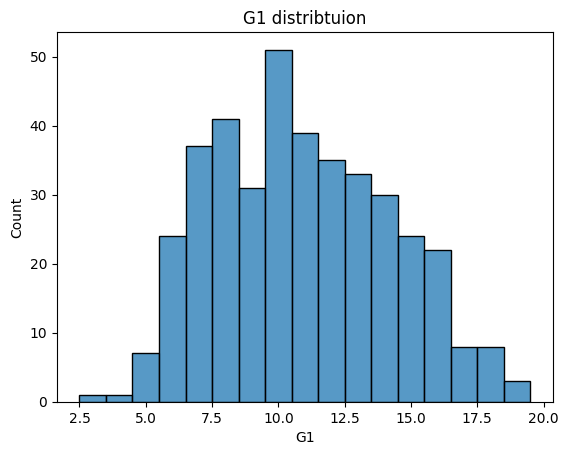

In [14]:
# Grade feature (G1)
sns.histplot(df_math['G1'], discrete=True)
plt.title('G1 distribtuion')
plt.show()

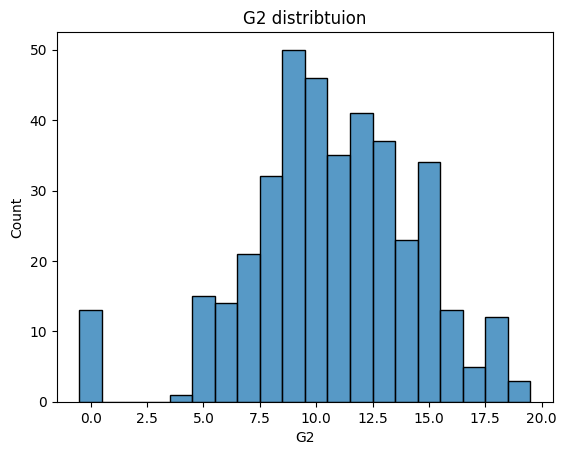

In [16]:
# Grade feature (G2)
sns.histplot(df_math['G2'], discrete=True)
plt.title('G2 distribtuion')
plt.show()

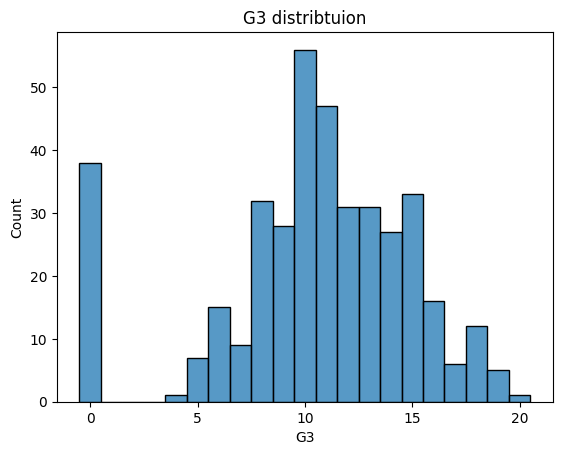

In [17]:
sns.histplot(df_math['G3'], discrete=True)
plt.title('G3 distribtuion')
plt.show()

#### ✅ 알 수 있는 것!

- G1, G2, G3의 경우 그래프가 정규분포를 따르는 것처럼 보임.

- 하지만, G2와 G3의 경우에 outlier가 존재함을 알 수 있음. (0인 학생들)

- 포르투갈의 성적평가 시스템을 보면, (https://www.scholaro.com/pro/Countries/Portugal/Grading-System) 가장 낮은 성적이 1점이기 때문에, 0점인 학생들에 대해 살펴볼 필요가 있음.

In [18]:
df_math.query('G3 == 0')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


#### ✅ 알 수 있는 것!

1. **G2의 값은 가지고 있지만 G3은 0점인 경우.**
- 결측값일 수도 있고, 데이터 세트가 생성될 때 어떤 상황으로 인해 학생의 성적이 없을 수도?

2. **G2와 G3 모두에서 0점을 받은 경우.**
- 이 경우의 학생들은 첫 번째 period가 끝난 후 학교를 떠났다고 가정할 수 있음.

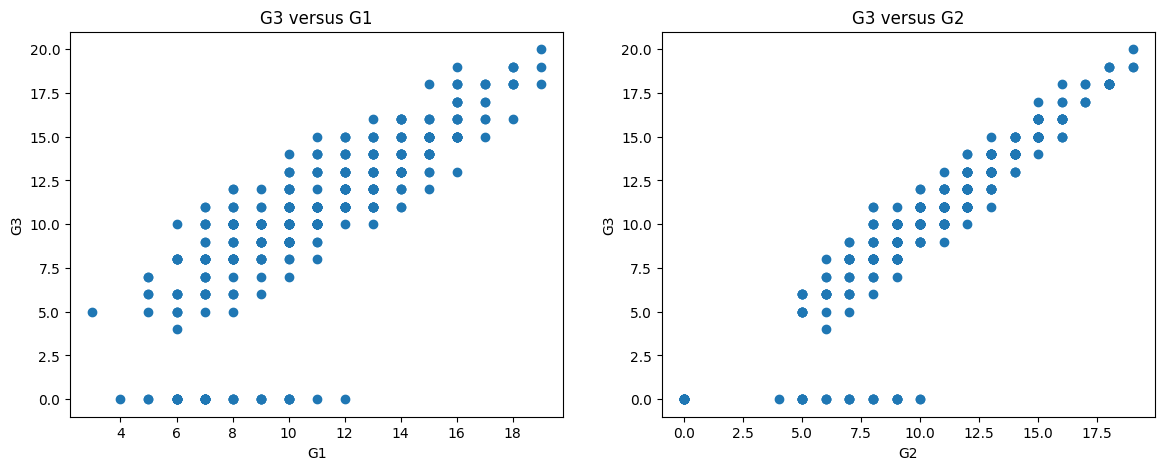

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(data=df_math, x='G1', y='G3')
axes[0].set_title('G3 versus G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
axes[1].scatter(data=df_math, x='G2', y='G3')
axes[1].set_title('G3 versus G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

#### ✅ 알 수 있는 것!
- 점들이 y=x선 주위에 흩어져 있는 것으로 보아, 학생들은 대개 1st period와 2nd period뿐만 아니라 final grade도 거의 같은 grade의 성적을 받는다고 할 수 있음.

- 향후 추론 단계에서, 단순화를 위해 G1만 고려할 수 있고, G1에서 얻은 결과를 G2 및 G3에도 적용할 수 있음.

### 2. Alcohol Consumption

#### 2-1. Alcohol Consumption vs. Gender

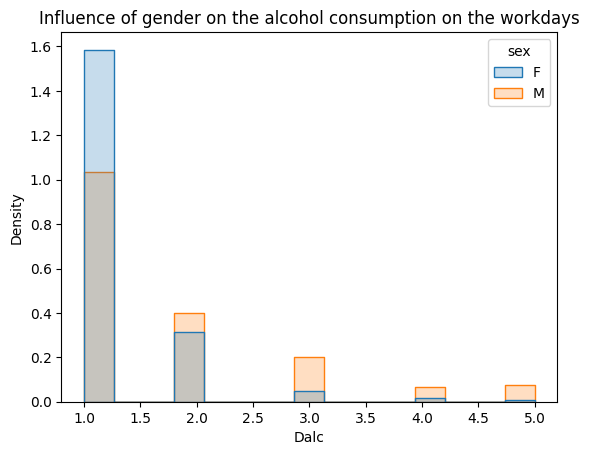

In [21]:
# effect of gender on alcohol consumption
sns.histplot(data=df_math, x="Dalc", hue="sex", element="step", stat="density")
plt.title('Influence of gender on the alcohol consumption on the workdays')
plt.show()

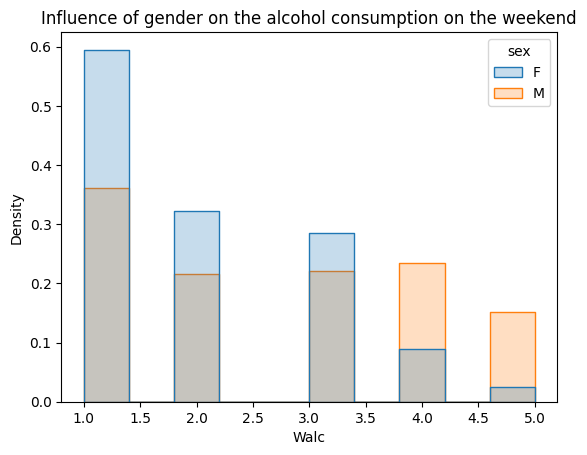

In [23]:
sns.histplot(data=df_math, x="Walc", hue="sex", element="step", stat="density")
plt.title('Influence of gender on the alcohol consumption on the weekend')
plt.show()

In [24]:
df_math.groupby('sex')[['Dalc', 'Walc']].mean()

,Dalc,Walc
sex,,
F,1.254808,1.956731
M,1.732620,2.663102


#### ✅ 알 수 있는 것!

- 남학생들이 여학생들보다 alcohol을 더 많이 마시는 것을 알 수 있음.

- 남학생과 여학생 두 그룹 모두 평일에 비해 주말에 술을 더 많이 마시는 것을 알 수 있음.

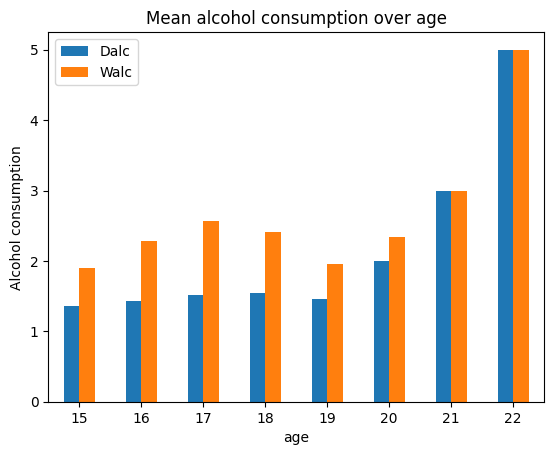

In [25]:
# influence of age on alcohol consumption
df_math.groupby('age')[['Dalc', 'Walc']].mean().plot(kind='bar')
plt.ylabel('Alcohol consumption')
plt.xticks(rotation=0)
plt.title('Mean alcohol consumption over age')
plt.show()

#### ✅ 알 수 있는 것!

- 연령이 증가함에 따라 주말의 음주량도 증가하여 17세에 정점에 도달한 다음, 약간 감소하다가 20~22세에 다시 크게 증가함.

- 그러나 앞서 본 연령 분포에서 알 수 있듯이, 19세 이상의 학생은 극히 소수이므로 이 데이터는 19세 이상의 학생들을 대표할 수 없음.

In [27]:
df_math.groupby('age')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
         mean count      mean count
age                                
15   1.353659    82  1.902439    82
16   1.432692   104  2.278846   104
17   1.520408    98  2.571429    98
18   1.548780    82  2.414634    82
19   1.458333    24  1.958333    24
20   2.000000     3  2.333333     3
21   3.000000     1  3.000000     1
22   5.000000     1  5.000000     1

#### 2-2. Alcohol Consumption vs. address & Pstatus

- address - type of pace student lives (urban vs. rural)

- Pstatus - parent's cohabitation status (living together vs. apart)

#### 2-2-1. Alcohol Consumption vs. address

In [29]:
# address feature
df_math.groupby('address')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
address                                
R        1.636364    88  2.534091    88
U        1.436482   307  2.221498   307

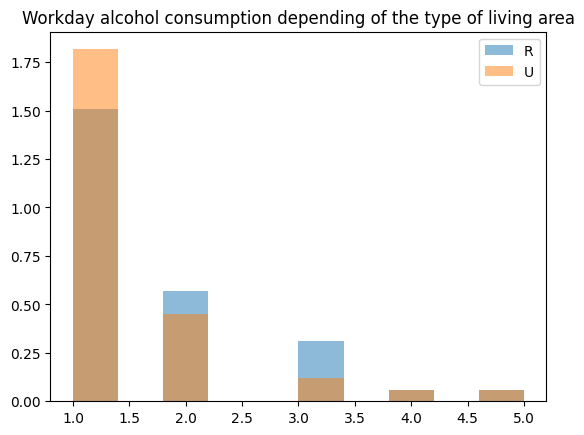

In [30]:
for group, data in df_math.groupby('address'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the type of living area')
plt.show()

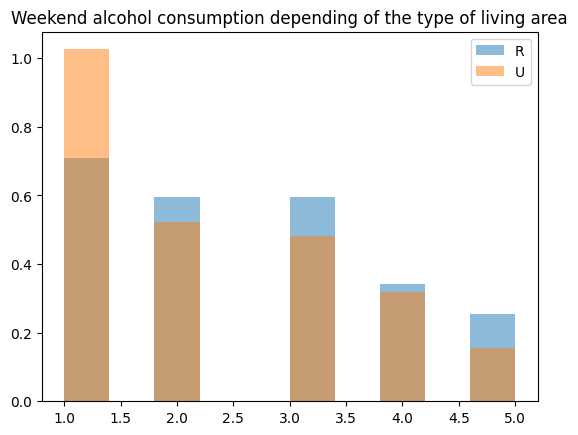

In [31]:
for group, data in df_math.groupby('address'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the type of living area')
plt.show()

#### ✅ 알 수 있는 것!

- 농촌에 사는 학생들이 술을 더 많이 마시는 것 같아 보이지만, 이러한 학생들의 수 자체는 그리 많지 않음.

- 통계적 검사를 통해서 확인해볼 필요가 있음.

In [32]:
# make 2 samples 
sample_R = df_math.query('address == "R"')['Walc']
sample_U = df_math.query('address == "U"')['Walc']

# set the significance level to 0.05 and use the t-test
t_stat, p_value = stats.ttest_ind(sample_R, sample_U)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 2.0150685295261135, p-value: 0.04457793151864655


#### ✅ 알 수 있는 것!

- P-value가 유의 수준보다 낮음.

- 이는 이러한 표본을 무작위로 추출할 확률이 낮다는 것을 의미하며(알코올 섭취량에 차이가 없다는 조건 하에서) 그 차이가 유의하다는 결론을 내릴 수 있음.

- 농촌 지역에 사는 학생들은 도시 지역에 사는 학생들보다 술을 더 많이 마시는 것이 맞음.

#### 2-2-2. Alcohol Consumption vs. Pstatus

In [33]:
df_math.groupby('Pstatus')[['Dalc', 'Walc']].agg(['mean', 'count'])

Dalc            Walc      
             mean count      mean count
Pstatus                                
A        1.560976    41  2.268293    41
T        1.471751   354  2.293785   354

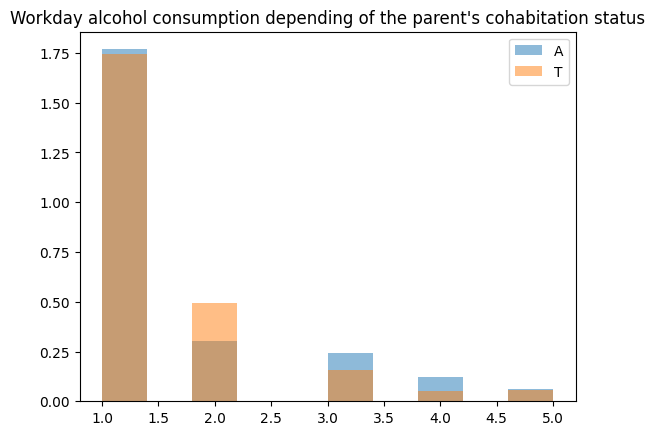

In [34]:
for group, data in df_math.groupby('Pstatus'):
    data['Dalc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Workday alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

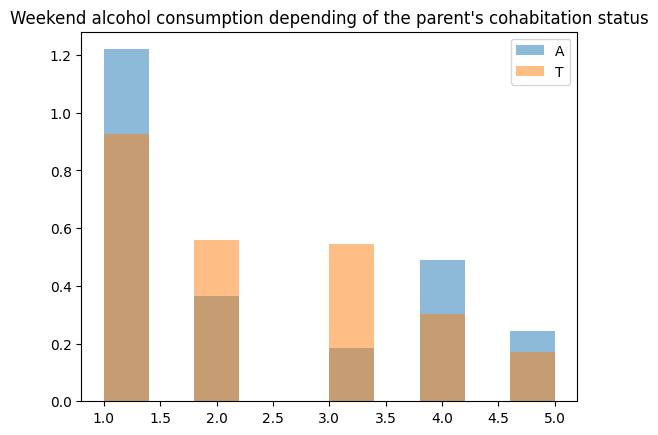

In [35]:
for group, data in df_math.groupby('Pstatus'):
    data['Walc'].hist(alpha=0.5, density=True, label=group, grid=False)
plt.legend()
plt.title('Weekend alcohol consumption depending of the parent\'s cohabitation status')
plt.show()

#### ✅ 알 수 있는 것!

- 부모와 떨어져 사는 학생들은 부모와 함께 사는 학생들에 비해 주중에는 술을 조금 더 마시고, 주말에는 술을 적게 마시는 것을 알 수 있음.

- 부모와 떨어져 사는 소규모 학생 표본을 고려할 때, 그 차이가 중요하다고 말할 수는 없기 때문에 부모의 동거 여부는 학생의 음주에 영향을 미치지 않는다고 할 수 있음.

### 3. Features affecting the Grade

- 앞서 얘기했던 것 처럼, G1, G2, G3는 거의 같은 성적을 받는다고 가정할 수 있기 때문에, G1만을 고려할 것임.

- 위에서 설명한 features들이 타겟(G1)에 어떤 영향을 미치는지 알아 볼 것임.

#### 3-1. Age

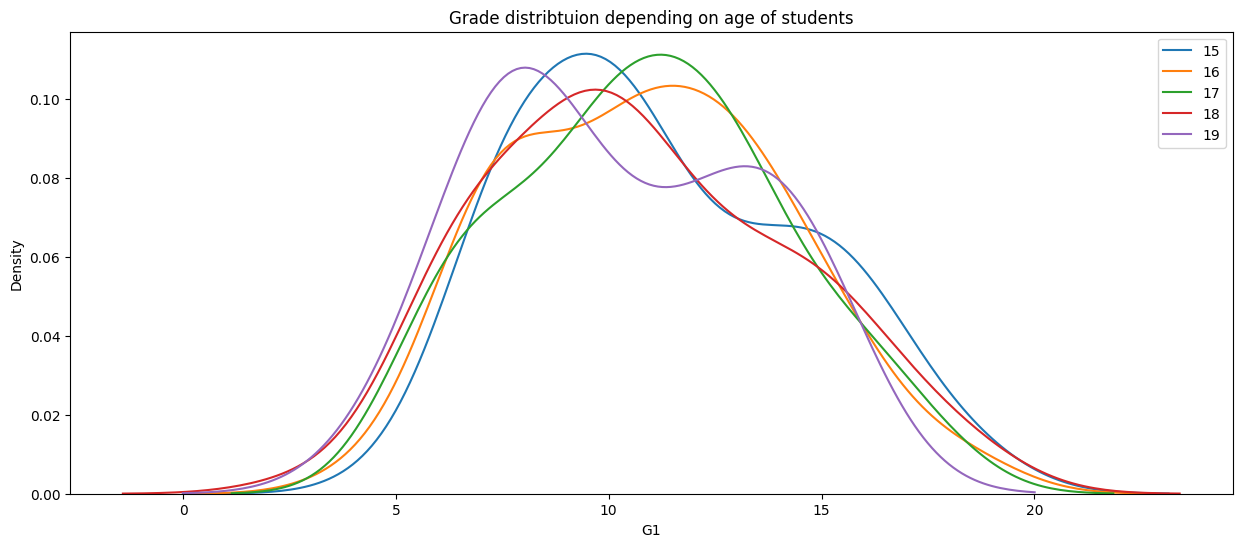

In [37]:
plt.figure(figsize=(15,6))
for age, grouped_data in df_math.groupby('age'):
    if age <= 19:
        sns.kdeplot(grouped_data['G1'], label=age)
plt.legend()
plt.title('Grade distribtuion depending on age of students')
plt.show()

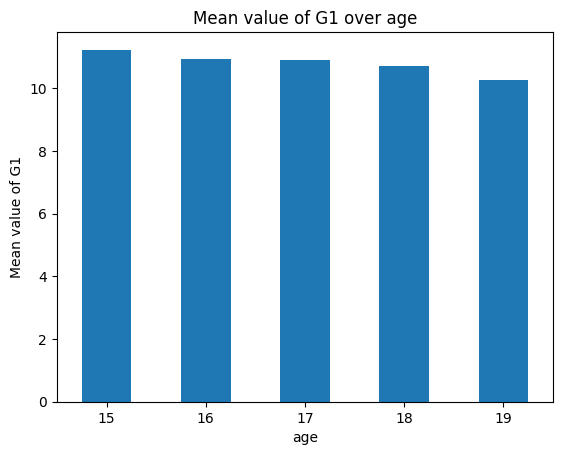

In [38]:
df_math.query('age <= 19').groupby('age')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over age')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

#### ✅ 알 수 있는 것!

- 연령별 G1의 분포는 크게 다르지 않음. 

- 평균값이 약간 감소하고 있는 것 뿐. 

- 연령별 차이가 유의한지 여부를 통계적 검정(t-test)을 적용하여 확인.

In [41]:
# t-test 15 vs 19
sample_15 = df_math.query('age == 15')['G1']
sample_19 = df_math.query('age == 19')['G1']
t_stat, p_value = stats.ttest_ind(sample_15, sample_19, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')


# t-test 15 vs 18
sample_15 = df_math.query('age == 15')['G1']
sample_18 = df_math.query('age == 18')['G1']
t_stat, p_value = stats.ttest_ind(sample_15, sample_18, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 15 vs 17
sample_15 = df_math.query('age == 15')['G1']
sample_17 = df_math.query('age == 17')['G1']
t_stat, p_value = stats.ttest_ind(sample_15, sample_17, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 15 vs 16
sample_15 = df_math.query('age == 15')['G1']
sample_16 = df_math.query('age == 16')['G1']
t_stat, p_value = stats.ttest_ind(sample_15, sample_16, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')


t-statistic: 1.3235620341816854, p-value: 0.19327505866818148
t-statistic: 0.9508839701860003, p-value: 0.34308506420662344
t-statistic: 0.6788552575665194, p-value: 0.49815301469480167
t-statistic: 0.5947175409968659, p-value: 0.5528168347429009


#### ✅ 알 수 있는 것!
- 차이가 미미하므로 나이가 성적에 영향을 미치지 않는다고 결론을 내릴 수 있음.

#### 3-2. Gender

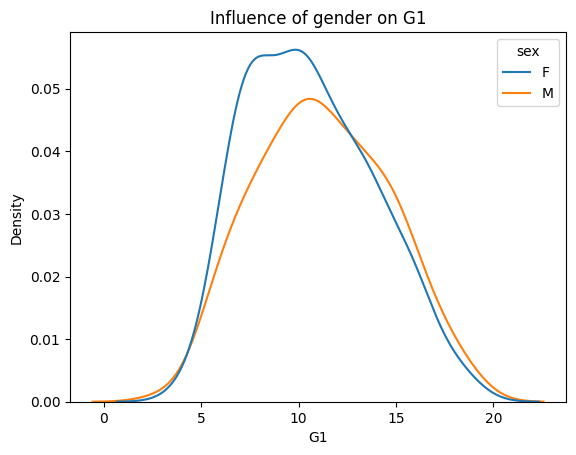

In [42]:
sns.kdeplot(data=df_math, x="G1", hue="sex")
plt.title('Influence of gender on G1')
plt.show()

In [43]:
df_math.groupby('sex')[['G1']].mean()

,G1
sex,
F,10.620192
M,11.229947


#### ✅ 알 수 있는 것!
- 분포가 약간 다르긴 함. (남성의 평균값이 여성보다 높음)

- 하지만, 그 차이가 크지 않으므로 통계 검정, 즉 유의 수준 0.05의 t-검정을 적용.

In [45]:
sample_male = df_math.query('sex == "M"')['G1']
sample_female = df_math.query('sex == "F"')['G1']
t_stat, p_value = stats.ttest_ind(sample_male, sample_female, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 1.8236602124360932, p-value: 0.06898106402330258


#### ✅ 알 수 있는 것!

- p-value가 유의 수준보다 높기 때문에 귀무 가설을 기각할 이유가 충분하지 않음.

- 남성과 여성의 평균 G1이 동일하다는 결론을 내릴 수 있음.

- 성별은 성적에 영향을 미치지 않는다고 할 수 있음.

#### 3-3. Alcohol Consumption

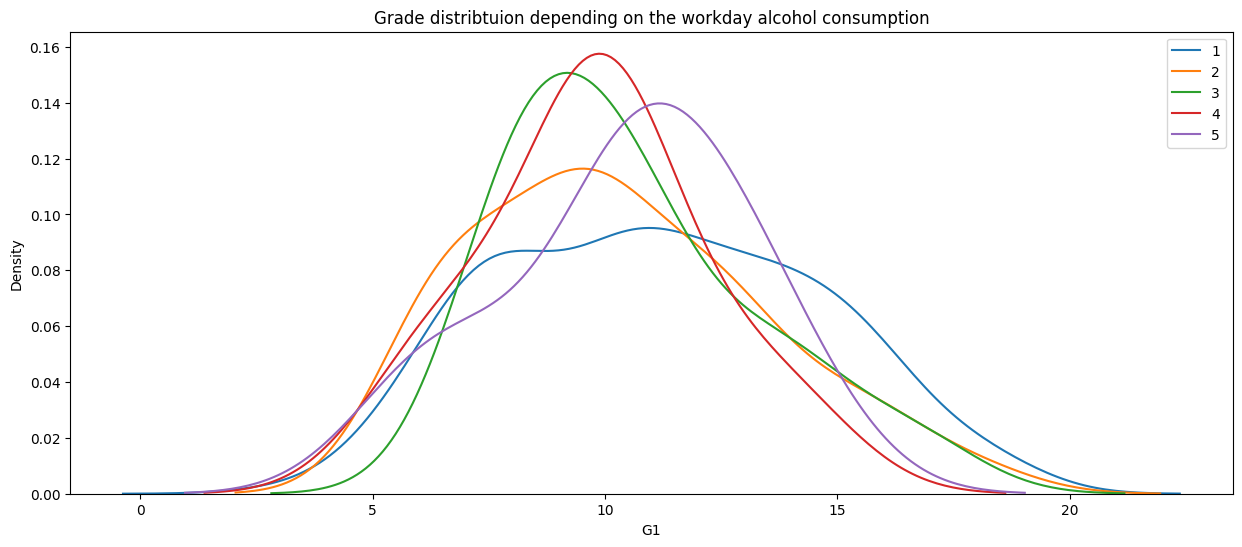

In [46]:
plt.figure(figsize=(15,6))
for dalc, grouped_data in df_math.groupby('Dalc'):
    sns.kdeplot(grouped_data['G1'], label=dalc)
plt.legend()
plt.title('Grade distribtuion depending on the workday alcohol consumption')
plt.show()

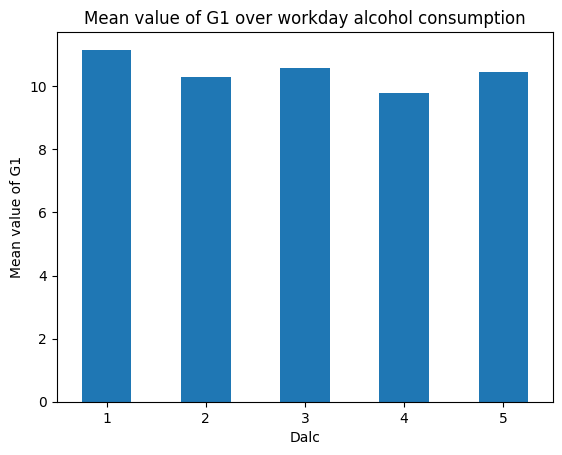

In [48]:
df_math.groupby('Dalc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over workday alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

#### ✅ 알 수 있는 것!

- 분포가 다름. 

- 근무일에 알코올을 적게 마시는(또는 전혀 알코올을 마시지 않는) 학생의 경우 peak가 넓지만 알코올을 많이 마시는 학생의 경우 peak가 더 좁음.

- 평균값은 조금씩 다르며, alcohol consumption이 가장 적은 학생의 평균 성적이 가장 높지만, 그룹의 규모가 다르고 표본이 상대적으로 작아서 확신할 수 없음.

- 유의수준 0.05의 t-test 진행.

In [49]:
# t-test 1 vs 2
sample_1 = df_math.query('Dalc == 1')['G1']
sample_2 = df_math.query('Dalc == 2')['G1']
t_stat, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 1 vs 3
sample_1 = df_math.query('Dalc == 1')['G1']
sample_3 = df_math.query('Dalc == 3')['G1']
t_stat, p_value = stats.ttest_ind(sample_1, sample_3, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 1 vs 4
sample_1 = df_math.query('Dalc == 1')['G1']
sample_4 = df_math.query('Dalc == 4')['G1']
t_stat, p_value = stats.ttest_ind(sample_1, sample_4, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 1 vs 5
sample_1 = df_math.query('Dalc == 1')['G1']
sample_5 = df_math.query('Dalc == 5')['G1']
t_stat, p_value = stats.ttest_ind(sample_1, sample_5, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 2.0417146944113362, p-value: 0.043238689145864484
t-statistic: 1.0271350894732836, p-value: 0.3117327064366279
t-statistic: 1.6760788650763143, p-value: 0.1275605526483468
t-statistic: 0.7971462612418896, p-value: 0.446010208160306


In [50]:
# sample size
df_math.groupby('Dalc')['Dalc'].count().to_frame()

,Dalc
Dalc,
1,276
2,75
3,26
4,9
5,9


#### ✅ 알 수 있는 것!

- 첫 번째 그룹과 두 번째 그룹의 차이는 상당히 큼.

- 다른 차이는 크지 않지만 알코올 소비량이 많은 그룹의 규모가 작기 때문에 발생할 수 있습니다.

- 따라서, 주중의 음주량이 성적에 영향을 미치고, 음주량이 적을수록 성적이 더 좋다고 할 수 있음.


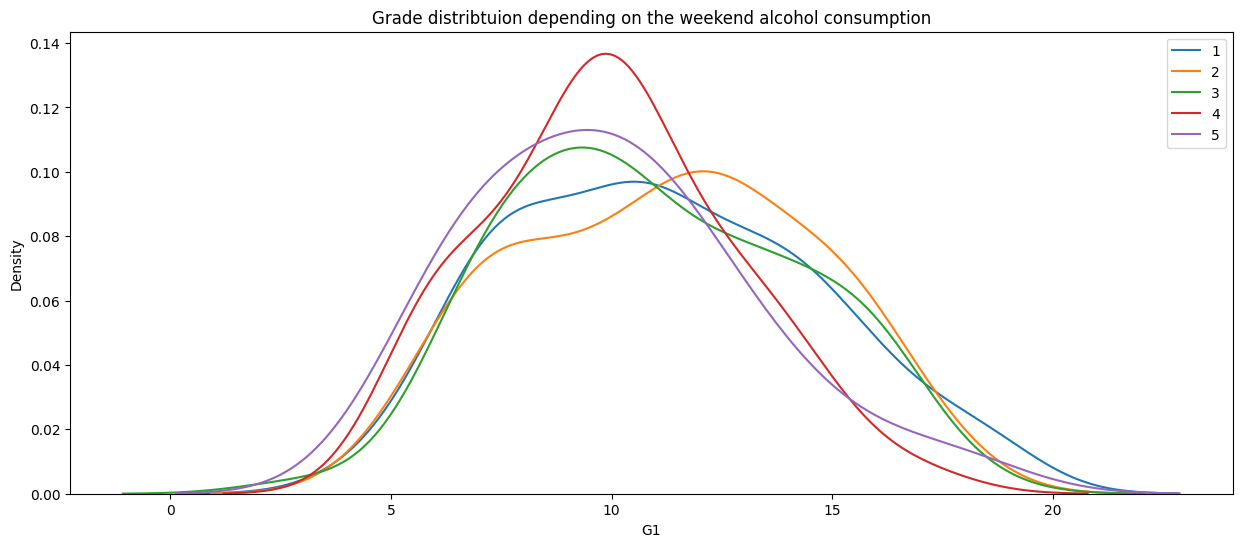

In [51]:
plt.figure(figsize=(15,6))
for walc, grouped_data in df_math.groupby('Walc'):
    sns.kdeplot(grouped_data['G1'], label=walc)
plt.legend()
plt.title('Grade distribtuion depending on the weekend alcohol consumption')
plt.show()

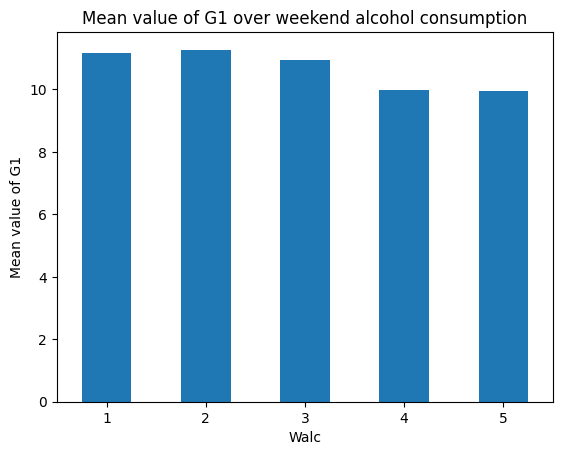

In [52]:
df_math.groupby('Walc')['G1'].mean().plot(kind='bar')
plt.title('Mean value of G1 over weekend alcohol consumption')
plt.ylabel('Mean value of G1')
plt.xticks(rotation=0)
plt.show()

#### ✅ 알 수 있는 것!
- t-test를 적용.

- 그룹 2의 평균값이 가장 높으므로 다른 그룹과 비교.

In [53]:
# t-test 2 vs 1
sample_2 = df_math.query('Walc == 2')['G1']
sample_1 = df_math.query('Walc == 1')['G1']
t_stat, p_value = stats.ttest_ind(sample_2, sample_1, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 2 vs 3
sample_2 = df_math.query('Walc == 2')['G1']
sample_3 = df_math.query('Walc == 3')['G1']
t_stat, p_value = stats.ttest_ind(sample_2, sample_3, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 2 vs 4
sample_2 = df_math.query('Walc == 2')['G1']
sample_4 = df_math.query('Walc == 4')['G1']
t_stat, p_value = stats.ttest_ind(sample_2, sample_4, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# t-test 2 vs 5
sample_2 = df_math.query('Walc == 2')['G1']
sample_5 = df_math.query('Walc == 5')['G1']
t_stat, p_value = stats.ttest_ind(sample_2, sample_5, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 0.2004859996334596, p-value: 0.8413238345026541
t-statistic: 0.6507208436274199, p-value: 0.5161450678698429
t-statistic: 2.4397541690445737, p-value: 0.016162523265396616
t-statistic: 1.871696157220972, p-value: 0.06736401492389404


In [54]:
df_math.groupby('Walc')['Walc'].count().to_frame()

,Walc
Walc,
1,151
2,85
3,80
4,51
5,28


#### ✅ 알 수 있는 것!

- 마지막 경우의 p-value가 유의 수준보다 약간 높음.

- 그럼에도 불구하고 주말에 술을 많이 마시면 ​​학교 성적이 낮아진다고 할 수 있음.

- 주말에 음주량이 적거나 중간인 학생은 동일한 성적을 받음.

### 4. Conclusion

#### ✅ 몇 가지 features와 grade에 미치는 영향.

- 데이터셋에 있는 대부분의 학생 연령은 15세에서 18세 사이. (가장 나이가 많은 학생은 22세)

- 대다수의 학생(거의 70%)은 근무 시간 동안 술을 마시지 않으며, 19%는 약간의 음주를 하고, 2.5%는 주중 동안 많이 마심.

- 주말에는 음주 상황이 달라짐. 38%의 학생이 술을 마시지 않고, 22%가 약간 마시고, 20%가 중간 정도의 음주를 하고, 13%가 중간보다 높으며, 7%가 가장 높은 음주를 함.

- grade는 정규 분포와 유사한 분포를 갖고 있음. 첫 번째 기간의 성적 G1, 두 번째 기간의 성적 G2, 최종 성적 G3 간에는 강한 선형 상관관계가 있음.

- 남학생이 여학생보다 술을 더 많이 마심.

- 연령이 높아질수록 주말 음주량도 늘어나 17세에 정점에 찍음.

- 농촌 지역에 사는 학생들은 도시 지역에 사는 학생들보다 술을 더 많이 마심.

- 나이와 성별은 성적에 영향을 미치지 않음.

- 알코올 섭취는 성적에 영향을 미침. 음주량이 많은 학생은 성적이 낮음.

## Feature Importance

- 어떤 features가 target에 영향을 미치고 어떤 features가 그렇지 않은지 파악하고, 그 영향을 평가할 것.

- EDA에세는 이러한 분석을 확률적으로 즉, 우리의 지식과 경험을 기반으로 대상에 영향을 미칠 수 있는 여러 features를 무작위로 고려했다면!

- 앞서 EDA에서 분석한 일부 features 이외에도 데이터셋은 30가지 features을 가지고 있고, 그들을 체계적이고 지능적으로 수행하는 방법(feature importance)을 사용할 것.

- feature importance를 추정하는 방법에는 correlation analysis, machine learning models 등 다양한 방법이 있음.

### 1. Correlation Analysis

- Correlation Analysis는 numeric variables 사이에서 선형 상관관계를 찾는 것을 의미함.

- 하지만 이 데이터셋에는 numeric variables가 2개(age, absences)뿐이어서 이 경우에는 상관분석을 적용하는 것이 의미가 없음.

In [55]:
df_math[['age', 'absences', 'G1']].corr()

,age,absences,G1
age,1.000000,0.175230,-0.064081
absences,0.175230,1.000000,-0.031003
G1,-0.064081,-0.031003,1.000000


#### ✅ 알 수 있는 것!

- 상관관계가 매우 약합니다.

- 상관관계는 선형 종속성을 가정하기 때문에, 이러한 가정이 성립하지 않는 경우에는 상관관계를 사용할 수 없음.

# Merge two dataframes

- df1 (math) 데이터와 df2 (Portuguese) 데이터를 merge하여 수학과 포르투갈어 시험을 모두 본 학생들의 데이터만을 포함하는 데이터프레임을 만드시오.

In [21]:
df_math.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'}, inplace=True)
df_port.rename(columns={'G1':'G1_Port', 'G2':'G2_Port', 'G3':'G3_Port'}, inplace=True)
print(df_math.columns)
print(df_port.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Mat', 'G2_Mat', 'G3_Mat'],
      dtype='object')
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Port', 'G2_Port', 'G3_Port'],
      dtype='object')


In [22]:
both = pd.merge(df_math, df_port, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                               'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                               'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
                               'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
                               'Walc', 'health', 'absences'])
both = both.drop_duplicates()

In [24]:
len(both)

85

In [30]:
both.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid_x        0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1_Mat        0
G2_Mat        0
G3_Mat        0
paid_y        0
G1_Port       0
G2_Port       0
G3_Port       0
dtype: int64

In [31]:
# 결측치가 있는 행을 찾으세요
both[both.isnull().any(axis=1)]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1_Mat,G2_Mat,G3_Mat,paid_y,G1_Port,G2_Port,G3_Port


(85, 37)


NameError: name 'value_counts' is not defined